# Models

In [112]:
#usual data manipluation/plot tools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#ML tools
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
#import graphviz


In [81]:
#create dataype dictionary for data, then import our cleaned data.
datatypes = {'Primary': 'category', 'UMSCUMCC': 'category', 'Age_at_dx': 'float', 'Sex': 'category',
       'Marital_status': 'category', 'Meno_stat': 'category', 'famhist': 'category', 'Nationality': 'category', 'Race': 'category',
       'diagnosis': 'category', 'Classification': 'category', 'Laterality': 'category', 'STAGEAJCC6': 'category',
       'Differentiation': 'category', 'ER_status': 'category', 'PR_status': 'category', 'CERB2_status': 'category', 'Pri_Rx': 'category',
       'Surgery_type': 'category', 'Axill_dissect': 'category', 'Radiotherapy': 'category', 'Chemotherapy': 'category',
       'Event': 'category'}

data = pd.read_csv('../../clean_cancer_data.csv', sep='\t',dtype=datatypes).copy()
data.rename(index=str, columns={'Unnamed: 0':'Patient_num'},inplace=True)


In [82]:
#all looks good
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2993
Data columns (total 24 columns):
Patient_num        2994 non-null int64
Primary            2994 non-null category
UMSCUMCC           2994 non-null category
Age_at_dx          2994 non-null float64
Sex                2994 non-null category
Marital_status     2994 non-null category
Meno_stat          2994 non-null category
famhist            2994 non-null category
Nationality        2994 non-null category
Race               2994 non-null category
diagnosis          2994 non-null category
Classification     2994 non-null category
Laterality         2994 non-null category
STAGEAJCC6         2994 non-null category
Differentiation    2994 non-null category
ER_status          2994 non-null category
PR_status          2994 non-null category
CERB2_status       2994 non-null category
Pri_Rx             2994 non-null category
Surgery_type       2994 non-null category
Axill_dissect      2994 non-null category
Radiotherapy       2

## Preprocessing
Not a lot do do here, we just need to split the data into a training and testing set (train/test: 80/20)

In [83]:
from sklearn import preprocessing
proc_data = data[['Primary','UMSCUMCC','Age_at_dx','Sex','Marital_status','Meno_stat','famhist','Nationality','Race','diagnosis','Classification','Laterality','STAGEAJCC6','Differentiation','ER_status','PR_status','CERB2_status','Pri_Rx','Surgery_type','Axill_dissect','Radiotherapy','Chemotherapy']].copy()


In [84]:
cancer_target = data[['Event']].copy()
print(data.Event.value_counts())

X_train, X_test, y_train, y_test = train_test_split(proc_data, np.ravel(cancer_target), test_size=0.20, random_state=101)

1    2323
0     671
Name: Event, dtype: int64


## SVM

In [126]:
#create and train model
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
#check precision using the test data (x_test and y_test)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.69      0.08      0.14       145
          1       0.77      0.99      0.87       454

avg / total       0.75      0.77      0.69       599



In [128]:
#Gridsearch - get the best parameters
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

print('\n')
print('The best parameters are ', grid.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7797246558197747, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7807017543859649, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7807017543859649, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7797246558197747, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7807017543859649, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7807017543859649, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7797246558197747, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7807017543859649, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7807017543859649, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7807017543859649, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7807017543859649, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7772215269086358, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7807017543859649, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7819548872180451, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7484355444305382, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7280701754385965, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   21.9s finished




The best parameters are  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [125]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))


             precision    recall  f1-score   support

          0       0.70      0.16      0.26       145
          1       0.78      0.98      0.87       454

avg / total       0.76      0.78      0.72       599



In [130]:
#train using the best parameters, then confirm
best_svm = SVC(C= 1000, gamma= 0.001, kernel= 'rbf')
best_svm.fit(X_train,y_train)
predictions = best_svm.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.70      0.16      0.26       145
          1       0.78      0.98      0.87       454

avg / total       0.76      0.78      0.72       599



# Decision Tree

In [89]:
#Import DecisionTreeClassifier


#Create an instance of the classifier
dtree = DecisionTreeClassifier()

#Fit the model on training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
#Use predict method on test set.
predictions = dtree.predict(X_test)

#Import classification report and confusion matrix
from sklearn.metrics import classification_report

#Print the result for classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.53      0.50      0.52       145
          1       0.84      0.86      0.85       454

avg / total       0.77      0.77      0.77       599



# Random Forest

In [94]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create an instance of the classifier
rfc = RandomForestClassifier(n_estimators=800)

#Fit the model on training set
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
#Use predict method on test set.
predictions = rfc.predict(X_test)

#Import classification report and confusion matrix
from sklearn.metrics import classification_report

#Print the result for classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.72      0.33      0.45       145
          1       0.82      0.96      0.88       454

avg / total       0.79      0.81      0.78       599



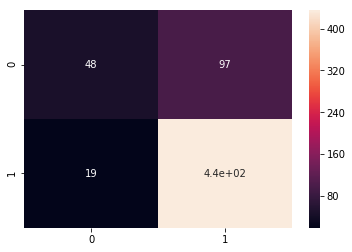

In [114]:
#confusion matrix, because why not
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
sns.heatmap(cm,annot=True)

# Cross Validation - SVM vs Decision Tree


In [131]:
#SVM
scores = cross_val_score(best_svm, proc_data, np.ravel(cancer_target), cv=20)
print ("Mean accuracy using cv 20 times: %0.2f (+/- %0.2f), best: %0.2f" % (scores.mean(), scores.std() / 2,scores.max()))
# this supports what we did before, now lets do kfold:
#Kfold = 5
cv = KFold(n_splits=5, random_state=101, shuffle=False) 
scores = cross_val_score(best_svm, proc_data, np.ravel(cancer_target), cv=cv)
print("Using a kfold of 5, best result: %0.2f, fold number: %d" %(scores.max(), np.where(scores == scores.max())[0]+1))
print(scores)


Mean accuracy using cv 20 times: 0.79 (+/- 0.02), best: 0.83
Using a kfold of 5, best result: 0.92, fold number: 5
[0.54924875 0.81135225 0.83806344 0.75459098 0.92307692]


In [105]:
#Decision Tree
scores = cross_val_score(dtree, proc_data, np.ravel(cancer_target), cv=20)
print ("Mean accuracy using cv 20 times: %0.2f (+/- %0.2f), best: %0.2f" % (scores.mean(), scores.std() / 2,scores.max()))
# as before KFold = 5
cv = KFold(n_splits=5, random_state=101, shuffle=False) 
scores = cross_val_score(dtree, proc_data, np.ravel(cancer_target), cv=cv)
print("Using a kfold of 5, best result: %0.2f, fold number: %d" %(scores.max(), np.where(scores == scores.max())[0]+1))
print(scores)


Mean accuracy using cv 20 times: 0.72 (+/- 0.04), best: 0.86
Using a kfold of 5, best result: 0.86, fold number: 5
[0.64440735 0.72954925 0.71285476 0.68781302 0.86287625]


In [132]:
#visualise decision tree:
#tree_dot = tree.export_graphviz(dtree,out_file=None)
#graph = graphviz.Source(dot_data)
#graph.render("cancer")

From the look of it SVM outperforms decision tree